In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SOLUSDT_30m_1h-pump05_200811_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2020-08-11 06:00:00,2.8500,3.4700,2.8500,3.1360,8928.93,84.0,6979.82,21792.568350,0,...,NaN,3.581029,0.197704,0.781708,NaN,NaN,NaN,0.563417,NaN,0.37931
1,2020-08-11 06:30:00,3.1360,3.1360,2.9054,2.9515,11103.33,183.0,1545.93,4635.802302,0,...,NaN,0.161752,0.078130,0.139231,NaN,NaN,NaN,-0.721538,NaN,0.37931
2,2020-08-11 07:00:00,2.9515,3.1355,2.9515,3.0345,13062.77,212.0,4639.33,14166.472847,0,...,NaN,0.550764,0.060636,0.355157,NaN,NaN,NaN,-0.289687,NaN,0.37931
3,2020-08-11 07:30:00,3.1040,3.1089,2.8800,2.9224,29006.60,260.0,10701.70,31405.456988,0,...,NaN,0.584636,0.078326,0.368940,NaN,NaN,NaN,-0.262120,NaN,0.37931
4,2020-08-11 08:00:00,2.9626,2.9662,2.9144,2.9278,18874.86,170.0,10133.43,29764.280760,0,...,NaN,1.159242,0.017692,0.536874,NaN,NaN,NaN,0.073749,NaN,0.37931


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SOLUSDT"
start_date = "2020-08-11"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close      volume  num_trades  \
 0        2.8500    3.4700    2.8500    3.1360    8928.930        84.0   
 1        3.1360    3.1360    2.9054    2.9515   11103.330       183.0   
 2        2.9515    3.1355    2.9515    3.0345   13062.770       212.0   
 3        3.1040    3.1089    2.8800    2.9224   29006.600       260.0   
 4        2.9626    2.9662    2.9144    2.9278   18874.860       170.0   
 ...         ...       ...       ...       ...         ...         ...   
 78370  239.8500  240.6400  239.4800  240.5100   32090.459     29097.0   
 78371  240.5100  240.7800  239.4300  240.7200   25893.852     22093.0   
 78372  240.7200  242.2000  239.9000  239.9700  110893.178     29759.0   
 78373  239.9600  240.8100  239.3300  240.3300   28017.211     32020.0   
 78374  240.3400  240.3700  238.3000  238.3100   27380.882     27172.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0            6979.820     2.179257e

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9294


np.float64(0.9293670495496301)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9294
AUC-ROC Score: 0.9672

Overall Metrics:
Accuracy:  0.8362
Precision: 0.8705
Recall:    0.8362
F1-Score:  0.8266

Class 0 Metrics:
Precision: 0.7817
Recall:    0.9976
F1-Score:  0.8766

Class 1 Metrics:
Precision: 0.9946
Recall:    0.6106
F1-Score:  0.7567

Using raw probabilities
Classification threshold: 0.9294
{'accuracy': 0.8362248438584317, 'precision': 0.8704957241292508, 'recall': 0.8362248438584317, 'f1': 0.8265755109086939, 'auc_roc': np.float64(0.9671658347199114), 'optimal_threshold': np.float64(0.9293670495496301), 'precision_0': 0.7817164179104478, 'recall_0': 0.9976190476190476, 'f1_0': 0.8765690376569037, 'precision_1': 0.994579945799458, 'recall_1': 0.610648918469218, 'f1_1': 0.756701030927835}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


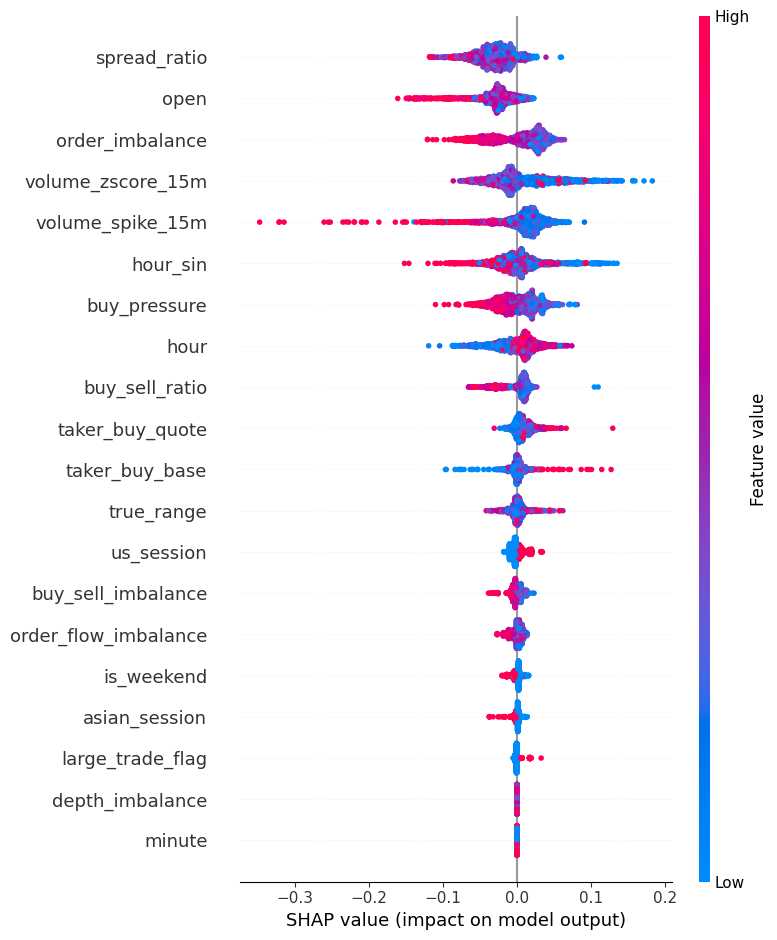


📈 Calculating feature importance...


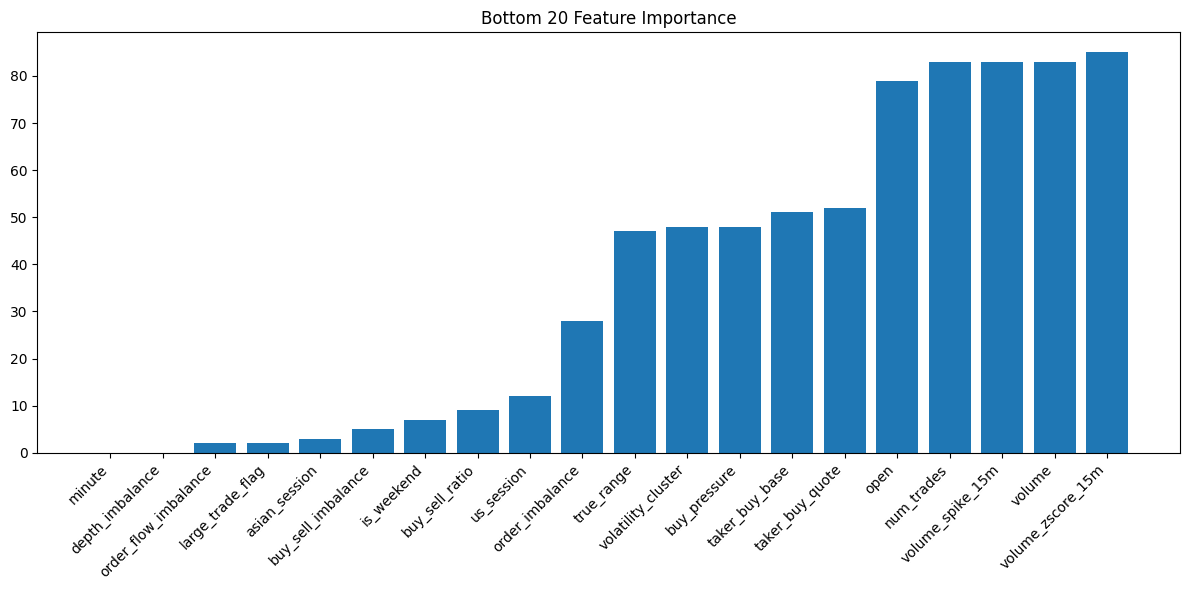

Found existing experiment
Identical result already exists for experiment ID: 26
Logged feature importance for experiment ID: 26


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="30m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="30m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()